# Classifiez automatiquement des biens de consommation - partie textuelle - modélisation non supervisée

## 1. Introduction

__Sommaire de tous les notebooks de ce dossier__

1. Analyse exploratoire des données textuelles
2. Analyse exploratoire des données visuelles__
3. __Prétraitement, feature extraction et faisabilité textuelle - premiers modèles__  
4. Prétraitement, feature extraction et faisabilité visuelle - premiers modèles

Dans ce notebook, nous allons traiter du troisième point. 

### Les critères à remplir dans ce notebook
   1. __Prétraiter des données textes pour obtenir un jeu de données exploitable.__
      - [ ] CE1 Vous avez nettoyé les champs de texte (suppression de la ponctuation et des mots de liaison, mise en minuscules)
      - [x] CE2 Vous avez écrit une fonction permettant de “tokeniser” une phrase.
      - [x] CE3 Vous avez écrit une fonction permettant de “stemmer” une phrase.
      - [x] CE4 Vous avez écrit une fonction permettant de “lemmatiser” une phrase.
      - [ ] CE5 Vous avez construit des features ("feature engineering") de type bag-of-words (bag-of-words standard : comptage de mots, et Tf-idf), avec des étapes de nettoyage supplémentaires : seuil de fréquence des mots, normalisation des mots.
      - [ ] CE6 Vous avez testé une phrase ou un court texte d'exemple, pour illustrer la bonne réalisation des 5 étapes précédentes.
      - [ ] CE7 Vous avez, en complément de la démarche de type “bag-of-words”, mis en oeuvre 3 démarches de word/sentence embedding : Word2Vec (ou Doc2Vec ou Glove ou FastText), BERT, et USE (Universal Sentence Encoder).
      - [ ] CE8 Vous vous êtes assurés que le texte traité ne relève pas d’une propriété intellectuelle dont l’utilisation ou la modification est interdite.

   2. __Mettre en œuvre des techniques de réduction de dimension.__
      - [ ] CE1 Vous avez justifié la nécessité de la réduction de dimension. 
      - [ ] CE2 Vous avez appliqué une méthode de réduction de dimension adaptée à la problématique (ex. : ACP). 
      - [ ] CE3 Vous avez justifié le choix des valeurs des paramètres dans la méthode de réduction de dimension retenue (ex. : le nombre de dimensions conservées pour l'ACP).  
 
   3. __Représenter graphiquement des données à grandes dimensions.__
      - [ ] CE1 Vous avez mis en œuvre au moins une technique de réduction de dimension (via LDA, ACP, T-SNE, UMAP ou autre technique).
      - [ ] CE2 Vous avez réalisé au moins un graphique représentant les données réduites en 2D (par exemple affichage des 2 composantes du T-SNE).
      - [ ] CE3 Vous avez réalisé et formalisé une analyse du graphique en 2D.

## Préparation de l'environnement

__Importation des librairies, fonctions et le jeu de données__

In [1]:
import sys
sys.path.append("/Users/audreyterrien/Documents/github_repositories/DS_Master_project_6/")
import my_packages

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/audreyterrien/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/audreyterrien/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/audreyterrien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


__Importation des librairies et du jeu de données__

In [37]:
import pandas as pd

from my_packages import (PATH_input, PATH_output, RANDOM_STATE, flipkart_stopword, 
 tokenize, stemming, lemmatisation, transform_bow_fct, transform_bow_stem_fct,
 transform_bow_lemm_fct, transform_dl_fct, cleaning_text,
 bold_print, freq_threshold, variance_needed_plot, premiere_evaluation_graphique,
 visu_fct, eval_metrics_df, conf_mat_transform, confusion_matrix_plot,
 classification_report_df, error_plot)
from nltk import word_tokenize

In [8]:

# Télécharger la liste de stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
#from nltk.stem import WordNetLemmatizer, PorterStemmer

#from re import sub
#from string import punctuation
#import unicodedata




[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/audreyterrien/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/audreyterrien/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/audreyterrien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


__Mise en place du format de l'affichage des données__

In [4]:
# Pour afficher l'ensemble du texte dans une cellule de dataframe
pd.set_option('display.max_colwidth', None)

__Importation du jeu de données textuel__

In [7]:
# Réimportation uniquement des données textuelles nécessaires
df = pd.read_csv(PATH_input+'flipkart_com-ecommerce_sample_1050.csv')    
df['CATEGORY'] = df['product_category_tree'].map(lambda x: x.split("[\"")[1].split(" >>", 1)[0])
df = df[['CATEGORY', 'description']]
df.columns = ['CATEGORY', 'TEXT']
df[df.index==222]

,CATEGORY,TEXT
222,Home Decor & Festive Needs,"Purpledip Kattle Showpiece - 15 cm (Steel, Multicolor)\r\n Price: Rs. 1,505\r\n\t\t\t\t\r\n\t\t\tPainted by the artisans of Rajasthan, this steel teapot brings good cheer & color to your teatime. Use it as a decorative piece to adorn your dining table or gift it as an Indian curio. Can hold hot beverages\r\nPainted by the artisans of Rajasthan, this steel teapot brings good cheer & color to your teatime. Use it as a decorative piece to adorn your dining table or gift it as an Indian curio. Can hold hot beverages"


In [20]:
%%time
# Prétraitement textuels

# tokenisation
df['TOKEN'] = df['TEXT'].map(tokenize)

# stemming
df['STEM'] = df['TEXT'].map(stemming)

# Lemmatisation
df['LEMM'] = df['TEXT'].map(lemmatisation)

# tokenisation + transformation en phrases
df['sentence_bow'] = df['TEXT'].map(transform_bow_fct)

# stemming + transformation en phrases
df['sentence_stem'] = df['TEXT'].map(transform_bow_stem_fct)

# Lemmatisation + transformation en phrases
df['sentence_lemm'] = df['TEXT'].map(transform_bow_lemm_fct)

# tokenisation pour modèle DL + transformation en phrases
df['sentence_dl'] = df['TEXT'].map(transform_dl_fct)

CPU times: user 4.42 s, sys: 11.1 ms, total: 4.43 s
Wall time: 4.46 s


In [13]:
# Taille maximum des features selon les techniques de prétraitement du texte
df['length_bow'] = df['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
df['length_dl'] = df['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
df['length_bow_lemm'] = df['sentence_lemm'].apply(lambda x : len(word_tokenize(x)))
df['length_bow_stem'] = df['sentence_stem'].apply(lambda x : len(word_tokenize(x)))

print("Nombre de mots maximum dans le bag-of-words avec la méthode de tokénisation :", df['length_bow'].max())
print("Nombre de mots maximum dans le bag-of-words avec la méthode de lemmatisation :", df['length_bow_lemm'].max())
print("Nombre de mots maximum dans le bag-of-words avec la méthode de stemming :", df['length_bow_stem'].max())
print("Nombre de mots maximum pour le deep learning (DL) avec la méthode de tokénisation :", df['length_dl'].max())

Nombre de mots maximum dans le bag-of-words avec la méthode de tokénisation : 330
Nombre de mots maximum dans le bag-of-words avec la méthode de lemmatisation : 330
Nombre de mots maximum dans le bag-of-words avec la méthode de stemming : 330
Nombre de mots maximum pour le deep learning (DL) avec la méthode de tokénisation : 562


In [14]:
# Premier exemple pour chaque type de modification (CE6)
row_index = 220
example_df = pd.DataFrame({'0. TEXT': df['TEXT'][row_index], 
                           '1. CLEAN_TEXT': cleaning_text(df['TEXT'][row_index]),
                           '2. TOKENIZATION': str(tokenize(df['TEXT'][row_index])),
                           '2B. TOKENIZED DOC': str(transform_bow_fct(df['TEXT'][row_index])),
                           '3. STEMMING': str(stemming(df['TEXT'][row_index])),
                           '3B. STEMMATIZED DOC': str(transform_bow_stem_fct(df['TEXT'][row_index])),
                           '4. LEMMATIZATION': str(lemmatisation(df['TEXT'][row_index])),
                           '4B. LEMMATIZED DOC': str(transform_bow_lemm_fct(df['TEXT'][row_index])),
                          }, index=['Test on sample 220']).rename_axis('Type de modification').T
example_df

Type de modification,Test on sample 220
0. TEXT,"Poppins Printed Baby Boy's Jumpsuit\r\n Price: Rs. 100\r\n\t\t\t\t\r\n\t\t\tHigh quality full sleeves romper suits for infants.Made from 100% Cotton, these rompers ensure whole day comfort. Also these are made from Ozone free dyes for your little one's safety.The pack contains 3 rompers - printed, striped and solid.Available in Multi colors with different sizes also.\r\nHigh quality full sleeves romper suits for infants.Made from 100% Cotton, these rompers ensure whole day comfort. Also these are made from Ozone free dyes for your little one's safety.The pack contains 3 rompers - printed, striped and solid.Available in Multi colors with different sizes also."
1. CLEAN_TEXT,poppins printed baby boy jumpsuit high quality full sleeves romper suits infants made cotton rompers ensure whole day comfort also made ozone dyes little one safety pack contains rompers printed striped solid available multi colors different sizes also high quality full sleeves romper suits infants made cotton rompers ensure whole day comfort also made ozone dyes little one safety pack contains rompers printed striped solid available multi colors different sizes also
2. TOKENIZATION,"['poppins', 'printed', 'baby', 'boy', 'jumpsuit', 'high', 'quality', 'full', 'sleeves', 'romper', 'suits', 'infants', 'made', 'cotton', 'rompers', 'ensure', 'whole', 'day', 'comfort', 'also', 'made', 'ozone', 'dyes', 'little', 'one', 'safety', 'pack', 'contains', 'rompers', 'printed', 'striped', 'solid', 'available', 'multi', 'colors', 'different', 'sizes', 'also', 'high', 'quality', 'full', 'sleeves', 'romper', 'suits', 'infants', 'made', 'cotton', 'rompers', 'ensure', 'whole', 'day', 'comfort', 'also', 'made', 'ozone', 'dyes', 'little', 'one', 'safety', 'pack', 'contains', 'rompers', 'printed', 'striped', 'solid', 'available', 'multi', 'colors', 'different', 'sizes', 'also']"
2B. TOKENIZED DOC,poppins printed baby boy jumpsuit high quality full sleeves romper suits infants made cotton rompers ensure whole day comfort also made ozone dyes little one safety pack contains rompers printed striped solid available multi colors different sizes also high quality full sleeves romper suits infants made cotton rompers ensure whole day comfort also made ozone dyes little one safety pack contains rompers printed striped solid available multi colors different sizes also
3. STEMMING,"['poppin', 'print', 'babi', 'boy', 'jumpsuit', 'high', 'qualiti', 'full', 'sleev', 'romper', 'suit', 'infant', 'made', 'cotton', 'romper', 'ensur', 'whole', 'day', 'comfort', 'also', 'made', 'ozon', 'dye', 'littl', 'one', 'safeti', 'pack', 'contain', 'romper', 'print', 'stripe', 'solid', 'avail', 'multi', 'color', 'differ', 'size', 'also', 'high', 'qualiti', 'full', 'sleev', 'romper', 'suit', 'infant', 'made', 'cotton', 'romper', 'ensur', 'whole', 'day', 'comfort', 'also', 'made', 'ozon', 'dye', 'littl', 'one', 'safeti', 'pack', 'contain', 'romper', 'print', 'stripe', 'solid', 'avail', 'multi', 'color', 'differ', 'size', 'also']"
3B. STEMMATIZED DOC,poppin print babi boy jumpsuit high qualiti full sleev romper suit infant made cotton romper ensur whole day comfort also made ozon dye littl one safeti pack contain romper print stripe solid avail multi color differ size also high qualiti full sleev romper suit infant made cotton romper ensur whole day comfort also made ozon dye littl one safeti pack contain romper print stripe solid avail multi color differ size also
4. LEMMATIZATION,"['poppins', 'printed', 'baby', 'boy', 'jumpsuit', 'high', 'quality', 'full', 'sleeve', 'romper', 'suit', 'infant', 'made', 'cotton', 'romper', 'ensure', 'whole', 'day', 'comfort', 'also', 'made', 'ozone', 'dye', 'little', 'one', 'safety', 'pack', 'contains', 'romper', 'printed', 'striped', 'solid', 'available', 'multi', 'color', 'different', 'size', 'also', 'high', 'quality', 'full', 'sleeve', 'romper', 'suit', 'infant', 'made', 'cotton', 'romper', 'ensure', 'whole', 'day', 'comfort', '

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# librairies pour la réduction des dimensions
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans
import seaborn as sns

# librairie pour l'évaluation du modèle 
from sklearn.metrics import (homogeneity_score, v_measure_score, completeness_score, 
                             confusion_matrix, precision_score, recall_score, 
                             accuracy_score, adjusted_rand_score, classification_report)
from joblib import dump, load

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
"""
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import RandomizedSearchCV
# librairies pour l'extraction des features
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize, FunctionTransformer, LabelEncoder

# librairies pour la réduction des dimensions
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation, PCA

# librairies pour le clustering
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture

# librairie pour l'évaluation du modèle 
from sklearn.metrics import (homogeneity_score, v_measure_score, completeness_score, 
                             confusion_matrix, precision_score, recall_score, 
                             accuracy_score, adjusted_rand_score, classification_report)
from joblib import dump, load
"""

"\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.base import BaseEstimator, TransformerMixin\nfrom sklearn.model_selection import RandomizedSearchCV\n# librairies pour l'extraction des features\nfrom sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer\nfrom sklearn.preprocessing import normalize, FunctionTransformer, LabelEncoder\n\n# librairies pour la réduction des dimensions\nfrom sklearn.manifold import TSNE\nfrom sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation, PCA\n\n# librairies pour le clustering\nfrom sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, SpectralClustering, Birch\nfrom sklearn.mixture import GaussianMixture\n\n# librairie pour l'évaluation du modèle \nfrom sklearn.metrics import (homogeneity_score, v_measure_score, completeness_score, \n                             confusion_matrix, precision_score, recall_score, \n                             accuracy_score, adjusted_rand_score, classification_

In [17]:
# Cache les warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
#def fonction_qui_peut_generer_un_warning():
#    # Exemple de code susceptible de générer un UserWarning
#    warnings.warn("Ceci est un UserWarning", UserWarning)

# Ignorer tous les UserWarning
#warnings.filterwarnings("ignore", category=UserWarning)

# Appel de la fonction
#fonction_qui_peut_generer_un_warning()

# Rétablir le comportement par défaut pour les UserWarning
#warnings.filterwarnings("default", category=UserWarning)

In [15]:
# Print en gras le texte
def bold_print(texte):
    bold_text = f"\033[1m{texte}\033[0m" 
    print(bold_text)

# Fonction créant un seuil de fréquence de mots (CE5)
def freq_threshold(X, threshold):
    """
    Supprime les mots dont la fréquence est inférieure à un certain seuil.
    """
    # Calcul de la fréquence de chaque mot
    freq = np.ravel(X.sum(axis=0))
    # Indices des mots à garder
    idx = np.where(freq >= threshold)[0]
    return X[:, idx]
  #('threshold', FunctionTransformer(freq_threshold)),

# Tracer le graphique de la variance expliquée cumulée en fonction du nombre de composants
def variance_needed_plot(cumulative_var, n_components):
  plt.plot(cumulative_var)
  plt.axvline(x=n_components, color='r', linestyle='--')
  plt.axhline(y=0.99, color='g', linestyle='--')
  plt.title("Accumulation du pourcentage de l'explication la variance \nen fonction du nombre de composants", size=12)
  plt.xlabel('Nombre de composants', size=11)
  plt.text(n_components-40, 0.3, f'n_components={n_components}', rotation=90, size=11, color='r')
  plt.text(1, 1, f'99% de la variance expliquée', rotation=0, size=11, color='g')
  plt.ylabel('Variance expliquée cumulée', size=11)
  plt.show()

# Créer le barplot avec seaborn
def premiere_evaluation_graphique(pred_label):
  # Convertir les prédictions en libellés
  df_pred = pd.DataFrame({'pred_label': le.inverse_transform(pred_label)})
  
  # Groupby sur les prédictions et compter les occurrences
  df_count = df_pred.groupby('pred_label').size().reset_index(name='Décompte')
  display(df_count)

  # Créer le barplot avec seaborn
  sns.set_style('whitegrid')
  fig, ax = plt.subplots(figsize=(10,6))
  sns.barplot(y='pred_label', x='Décompte', data=df_count, palette=palette)
  plt.xticks(rotation=45, ha='right', fontsize=12)
  plt.xlabel('Prédiction', fontsize=14, fontweight='bold')
  plt.ylabel('Nombre d\'occurrences', fontsize=14, fontweight='bold')
  plt.title('Occurrences des prédictions', fontsize=16, fontweight='bold')
  plt.show()

# Affichage graphique représentant les données réduites en 2D (CE2)
def visu_fct(X_reduction_model, true_label, pred_label):
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_reduction_model[:,0],
                         X_reduction_model[:,1], 
                         c=true_label, 
                         cmap=my_cmap,
                         norm=norm)
    ax.legend(handles=scatter.legend_elements()[0], 
              labels=cat_list, 
              loc="best", 
              title="Catégorie")
    plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
    plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
    plt.title('Représentation des descriptions\npar catégories réelles',
              fontsize=18, 
              pad=5, 
              fontweight='bold')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_reduction_model[:,0],
                         X_reduction_model[:,1], 
                         c=pred_label, 
                         cmap=my_cmap,
                         norm=norm)
    ax.legend(handles=scatter.legend_elements()[0], 
              labels=set(pred_label), 
              loc="best", 
              title="Clusters")
    plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
    plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
    plt.title('Représentation des descriptions\npar clusters', 
              fontsize=18, 
              pad=5, 
              fontweight='bold')
    
    plt.show()

# fonction d'évaluation d'un modèle présentés sous forme d'un tableau
def eval_metrics_df(true_label, pred_label):
    v_measure = np.round(v_measure_score(true_label, pred_label),4)
    completeness = np.round(completeness_score(true_label, pred_label),4)
    homogeneity = np.round(homogeneity_score(true_label, pred_label),4)
    ARI = np.round(adjusted_rand_score(true_label, pred_label),4)
    metric_df = pd.DataFrame([[v_measure, completeness, homogeneity, ARI]], 
                             columns=['v_measure', 
                                      'completeness', 
                                      'homogeneity', 
                                      'ARI'])
    return metric_df

# Modifcation des labels prédits pour les rapprocher le plus possible des vrais labels
def conf_mat_transform(y_true, y_pred) :
    conf_mat = confusion_matrix(y_true,y_pred)
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    return labels['y_pred_transform']


# Visualiser de la matrice de confusion sous forme graphique
def confusion_matrix_plot(true_label, pred_label):
  conf_mat = confusion_matrix(true_label, pred_label)
  df_cm = pd.DataFrame(conf_mat, index=[label for label in cat_list],
                      columns=[i for i in "0123456"])

  #sns.set(style="white")
  plt.subplots(figsize=(9, 6))
  sns.heatmap(df_cm, annot=True, cmap='YlOrBr', fmt='d', cbar=False, 
              square=True, linewidths=.5, cbar_kws={"shrink": .5})
  plt.title('Matrice de confusion entre les clusters créés et les catégories des produits réelles')
  plt.xlabel('Clusters')
  plt.ylabel('Catégories')
  plt.xticks(rotation=45)
  plt.yticks(rotation=0)
  plt.tight_layout()
  plt.show()

# Calculer et créer le rapport de classification
def classification_report_df(true_label, pred_label):
  report = classification_report(true_label,pred_label, output_dict=True)
  return pd.DataFrame(report).transpose().round(2)

def error_plot(true_label, pred_label):
  # Créer un dataframe pour les prédictions
  df_pred = pd.DataFrame({'true_label': le.inverse_transform(true_label), 'pred_label': le.inverse_transform(pred_label)})
  df_errors = (
    df_pred
    .groupby(['true_label', 'pred_label'])
    .size()
    .reset_index(name='Décompte')
    [['true_label', 'pred_label', 'Décompte']])
  display(df_errors)
  
  # Création du graphique à barres
  sns.barplot(data=df_errors, y='true_label', x='Décompte', hue='pred_label', hue_order=cat_list, palette=palette)
  # Positionner la boîte de la légende en dehors du graphe
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Catégorie prédite')
  # Affichage du graphe
  plt.xlabel("Nombre de produits")
  plt.ylabel("Catégorie réelle")
  plt.title("Visualisation sur erreurs de catégorisation:\nNombre de produits prédits en fonction de leur vrai catégorie")
  plt.show()

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Télécharger la liste de mots vides pour la langue anglaise
nltk.download('stopwords')

# Importer la liste de mots vides pour la langue anglaise
stop_word = set(nltk.corpus.stopwords.words('english'))

# Votre liste personnalisée de mots vides
flipkart_stopword = {'word1', 'word2', 'word3'}  # Ajoutez vos propres mots vides ici

# Assurez-vous que tous les mots de flipkart_stopword sont également dans stop_words
custom_stop_words = flipkart_stopword.intersection(stop_word)
custom_stop_words = list(flipkart_stopword)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [75]:

import numpy as np
from scipy.stats import randint as sp_randint
from sklearn.pipeline import Pipeline
# librairies pour la réduction des dimensions
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#from sklearn.preprocessing import LabelEncoder, FunctionTransformer
#from sklearn.base import BaseEstimator, TransformerMixin
#from sklearn.cluster import KMeans
#import seaborn as sns

# librairie pour l'évaluation du modèle 
#from sklearn.metrics import (homogeneity_score, v_measure_score, completeness_score, 
#                             confusion_matrix, precision_score, recall_score, 
#                             accuracy_score, adjusted_rand_score, classification_report)
#from joblib import dump, load

#import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap, BoundaryNorm

In [78]:
from sklearn.metrics import silhouette_score, make_scorer

# Définir la fonction de scoring personnalisée
def silhouette_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    # La silhouette score nécessite au moins 2 labels pour être calculée.
    if len(set(cluster_labels)) > 1:
        score = silhouette_score(X, cluster_labels)
        return score
    else:
        return -1  # retourner une valeur négative si un seul cluster est formé

# Utiliser make_scorer pour créer un objet scorer utilisable par GridSearchCV
custom_scorer = make_scorer(silhouette_scorer, greater_is_better=True)

Pipeline(steps=[('preprocess',
                 TfidfVectorizer(max_df=0.98, min_df=2, ngram_range=(1, 2),
                                 stop_words=["didn't", 'myself', 'yourself',
                                             'its', "that'll", 'don', 'didn',
                                             "mightn't", 'nor', "wasn't", 'am',
                                             'where', 'any', "mustn't",
                                             "wouldn't", 'an', 'needn',
                                             'couldn', 'again', 'o', 'whom',
                                             'then', 'doing', 'so', 'before',
                                             'between', 'she', 'ourselves',
                                             'more', 'the', ...])),
                ('reducDimension', TruncatedSVD(n_components=4000))])

{'elegance': 1632, 'polyester': 3672, 'multicolor': 3108, 'abstract': 8, 'eyelet': 1747, 'door': 1516, 'curtain': 1233, 'floral': 1877, 'height': 2258, 'pack': 3356, 'enhances': 1653, 'look': 2762, 'interior': 2473, 'made': 2816, 'high': 2275, 'quality': 3873, 'fabric': 1753, 'style': 4688, 'stitch': 4644, 'metal': 2991, 'ring': 4092, 'make': 2847, 'room': 4108, 'environment': 1671, 'ant': 159, 'anti': 160, 'shrinkage': 4361, 'elegant': 1633, 'give': 2092, 'home': 2299, 'bright': 621, 'appeal': 183, 'design': 1353, 'attention': 259, 'sure': 4741, 'heart': 2254, 'contemporary': 1068, 'slide': 4474, 'smoothly': 4502, 'draw': 1529, 'apart': 178, 'first': 1840, 'thing': 4816, 'morning': 3066, 'welcome': 5267, 'sun': 4725, 'ray': 3946, 'want': 5159, 'wish': 5337, 'good': 2153, 'whole': 5295, 'world': 5379, 'evening': 1687, 'create': 1203, 'special': 4570, 'moment': 3051, 'beauty': 368, 'given': 2101, 'soothing': 4553, 'print': 3765, 'bring': 627, 'light': 2685, 'get': 2033, 'right': 4090, '

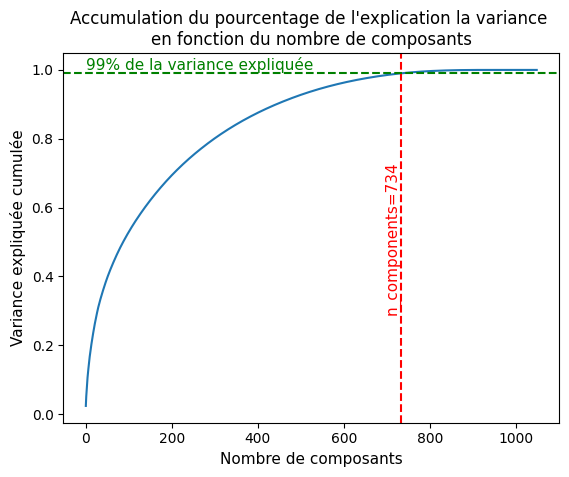

Pipeline(steps=[('preprocess',
                 TfidfVectorizer(max_df=0.98, min_df=2, ngram_range=(1, 2),
                                 stop_words=["didn't", 'myself', 'yourself',
                                             'its', "that'll", 'don', 'didn',
                                             "mightn't", 'nor', "wasn't", 'am',
                                             'where', 'any', "mustn't",
                                             "wouldn't", 'an', 'needn',
                                             'couldn', 'again', 'o', 'whom',
                                             'then', 'doing', 'so', 'before',
                                             'between', 'she', 'ourselves',
                                             'more', 'the', ...])),
                ('reducDimension', TruncatedSVD(n_components=734)),
                ('tsne', TSNE(random_state=42))])

La perplexité du TSNE a été fixé automatiquement par le modèle a 30.0


In [82]:
# éléments à fixer pour ce modèle
feat_ = 'sentence_lemm'
model_name = 'tf_lem_tsne_01'

# Technique de preprocessing de langage choisi
preprocessing_ = TfidfVectorizer(stop_words=flipkart_stopword,
                                ngram_range=(1,2), #combine de mot unigrammes (un mot) et de bigramme (mot composé de 2 mots)
                                min_df=2, #min de deux mots
                                max_df=0.98,
                                #vocabulary=custom_vocab
                                )


# Création d'un premier pipeline permettant de calculer le nombre de dimension 
# à garder pour conserver une explication de la variance à une hauteur de 99%
# pour le vrai pipeline et ainsi diminuer le temps d'éxecution de la pipeline
pipeline_ = Pipeline([
    ('preprocess', preprocessing_),
    ('reducDimension', TruncatedSVD(n_components=4000)),
])

# Entraîner le pipeline
display(pipeline_.fit(df[feat_]))

# Affichage du vocabulaire
vocab = preprocessing_.vocabulary_
print(vocab)

# Calculer la variance expliquée cumulée
explained_variance = pipeline_.named_steps['reducDimension'].explained_variance_ratio_
cumulative_var = np.cumsum(explained_variance)

# Trouver le nombre de dimensions nécessaires pour atteindre 0.99 de la variance expliquée
n_components = np.argmax(cumulative_var >= 0.99) + 1

# Représentation graphique du nombre de dimensions minimums pour pouvoir 
# conserver 99% de l'explication de la variance observée
variance_needed_plot(cumulative_var=cumulative_var, n_components=n_components)

# Rajout du nombre de composants nécéssaire pour garder 99% de la variance +
# Détermination des hyperparamètres liées à la T-SNE
pipeline_ = Pipeline([
    # Preprocessing: construction des features
    ('preprocess', preprocessing_),
    # Réduction des dimensions pour ne garder que 99% de l'explication de la variance
    ('reducDimension', TruncatedSVD(n_components=n_components)),
    # Réduction TSNE 
    ('tsne', TSNE(n_components=2, random_state=RANDOM_STATE))
])

# Entraîner le pipeline
display(pipeline_.fit(df[feat_]))

# Observation sur les paramètres par défaut choisi lors de son entraînement
# pour la TSNE
print('La perplexité du TSNE a été fixé automatiquement par le modèle a', pipeline_.get_params()['tsne__perplexity'])


# Définir les paramètres à tester
params_ = {
    # Paramètres pour TF-IDF
    'preprocess__ngram_range': [(1, 1), (1, 2)],  # Teste les unigrammes et bigrammes
    'preprocess__min_df': sp_randint(1, 3),  # Teste min_df à 1, 2, 3
    #'preprocess__max_df': uniform(0.75, 0.95),  # Teste max_df entre 0.75 et 0.95

    # Paramètres pour t-SNE
    'tsne__perplexity': sp_randint(10, 15),  # Teste perplexity entre 10 et 80
    #'tsne__n_iter': sp_randint(500, 5000),  # Teste n_iter entre 500 et 5000
}

# Créer un objet RandomizedSearchCV pour trouver les meilleurs paramètres
random_search_ = RandomizedSearchCV(estimator=pipeline_, 
                                        param_distributions=params_, 
                                        cv=2, 
                                        n_iter=10,
                                        n_jobs=-1, 
                                        verbose=1,
                                        random_state=42, 
                                        scoring=silhouette_scorer
                                        )


In [83]:
random_search_.fit(df[feat_])

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/opt/anaconda3/envs/ocds6/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ocds6/lib/python3.9/site-packages/sklearn/utils/_available_if.py", line 29, in _check
    check_result = self.check(obj)
  File "/opt/anaconda3/envs/ocds6/lib/python3.9/site-packages/sklearn/pipeline.py", line 53, in check
    getattr(self._final_estimator, attr)
AttributeError: 'TSNE' object has no attribute 'fit_predict'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/envs/ocds6/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "/var/folders/y8/0dkjv1px0dd06lnbd5w742m00000gq/T/ipykernel_45689/3600814857.py", line 5, in silhouette_

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('preprocess',
                                              TfidfVectorizer(max_df=0.98,
                                                              min_df=2,
                                                              ngram_range=(1,
                                                                           2),
                                                              stop_words=["didn't",
                                                                          'myself',
                                                                          'yourself',
                                                                          'its',
                                                                          "that'll",
                                                                          'don',
                                                                          'didn',
                                                                          "mightn't",
                                                                          'nor',
                                                                          "wasn't",
                                                                          'am',
                                                                          'where',
                                                                          'any',
                                                                          "mustn't",
                                                                          "wouldn't",
                                                                          'an',
                                                                          'needn',
                                                                          'couldn',
                                                                          'again',
                                                                          'o',
                                                                          'whom',
                                                                          'then',
                                                                          'doing',
                                                                          'so',
                                                                          'before',
                                                                          'between',
                                                                          'she',
                                                                          'ourselve...
                                             ('tsne', TSNE(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'preprocess__min_df': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7939f28ee0>,
                                        'preprocess__ngram_range': [(1, 1),
                                                                    (1, 2)],
                                        'tsne__perplexity': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7928983070>},
                   random_state=42,
                   scoring=<function silhouette_scorer at 0x7f7939b4fa60>,
                   verbose=1)

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Configuration du pipeline
pipeline_ = Pipeline([
    ('preprocess', TfidfVectorizer(stop_words='english')),
    ('reducDimension', TruncatedSVD(n_components=50)),  # Réduction de dimension initiale pour optimiser t-SNE
    ('tsne', TSNE(n_components=2, random_state=42)),   # t-SNE pour la visualisation en 2D
])

# Définition de la fonction de scoring adaptée
def silhouette_scorer(estimator, X):
    # Appliquer fit_predict pour obtenir les labels des clusters
    cluster_labels = estimator.fit_predict(X)
    return silhouette_score(X, cluster_labels)

# Création d'un scorer utilisable par GridSearchCV ou RandomizedSearchCV
silhouette_custom_scorer = make_scorer(silhouette_scorer)

# Utilisation dans RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_distributions = {
    #'cluster__n_clusters': sp_randint(3, 10),
    'tsne__perplexity': sp_randint(10, 20)
}

search = RandomizedSearchCV(pipeline_, 
                            param_distributions=param_distributions, 
                            n_iter=10, 
                            scoring=silhouette_custom_scorer, verbose=1, cv=2)
search.fit(df[feat_])  # Supposons que df[feat_] est votre jeu de données textuelles

print("Meilleurs paramètres trouvés :", search.best_params_)
print("Meilleur score de silhouette :", search.best_score_)


Fitting 2 folds for each of 10 candidates, totalling 20 fits


/opt/anaconda3/envs/ocds6/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ocds6/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/opt/anaconda3/envs/ocds6/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ocds6/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: __call__() missing 1 required positional

Meilleurs paramètres trouvés : {'tsne__perplexity': 17}
Meilleur score de silhouette : nan


In [ ]:


# Afficher les meilleurs paramètres trouvés
print("Les Meilleurs paramètres pour l'étape TSNE :")
print(random_search_.best_params_)

In [63]:
# Observation sur les paramètres par défaut choisi lors de son entraînement
# pour la TSNE
print('La perplexité du TSNE a été fixé automatiquement par le modèle a', pipeline_.get_params()['tsne__perplexity'])

##%%time
# Définir les paramètres à tester
tsne_params = {
    'tsne__perplexity': [5, 10]#, 20, 30]
    #'tsne__n_iter': sp_randint(500, 5000),
}

from sklearn.metrics import silhouette_score

# Fonction pour calculer la silhouette score pour TSNE
def silhouette_scorer(estimator, X):
    transformed = estimator.fit_transform(X)
    if hasattr(estimator, 'labels_'):
        labels = estimator.labels_
    else:
        labels = estimator.predict(X)
    return silhouette_score(X, labels)

# Créer un objet RandomizedSearchCV pour trouver les meilleurs paramètres
tsne_random_search = GridSearchCV(estimator=pipeline_, 
                                        param_grid=tsne_params, 
                                        cv=3, 
                                        #n_iter=20,
                                        n_jobs=-1, 
                                        verbose=1,
                                        #random_state=RANDOM_STATE, 
                                        scoring=silhouette_scorer,
                                        )
tsne_random_search.fit(df[feat_])

# Pour afficher les meilleurs paramètres trouvés et les utiliser pour la configuration de TSNE
#print("Les Meilleurs paramètres pour l'étape TSNE :")
#print(tsne_random_search.best_params_)

La perplexité du TSNE a été fixé automatiquement par le modèle a 30.0
Fitting 3 folds for each of 2 candidates, totalling 6 fits


/opt/anaconda3/envs/ocds6/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ocds6/lib/python3.9/site-packages/sklearn/utils/_available_if.py", line 29, in _check
    check_result = self.check(obj)
  File "/opt/anaconda3/envs/ocds6/lib/python3.9/site-packages/sklearn/pipeline.py", line 53, in check
    getattr(self._final_estimator, attr)
AttributeError: 'TSNE' object has no attribute 'predict'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/envs/ocds6/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "/var/folders/y8/0dkjv1px0dd06lnbd5w742m00000gq/T/ipykernel_45689/54435270.py", line 20, in silhouette_score

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        TfidfVectorizer(max_df=0.98, min_df=2,
                                                        ngram_range=(1, 2),
                                                        stop_words=["didn't",
                                                                    'myself',
                                                                    'yourself',
                                                                    'its',
                                                                    "that'll",
                                                                    'don',
                                                                    'didn',
                                                                    "mightn't",
                                                                    'nor',
                                                                    "wasn't",
                                                                    'am',
                                                                    'where',
                                                                    'any',
                                                                    "mustn't",
                                                                    "wouldn't",
                                                                    'an',
                                                                    'needn',
                                                                    'couldn',
                                                                    'again',
                                                                    'o', 'whom',
                                                                    'then',
                                                                    'doing',
                                                                    'so',
                                                                    'before',
                                                                    'between',
                                                                    'she',
                                                                    'ourselves',
                                                                    'more',
                                                                    'the', ...])),
                                       ('reducDimension',
                                        TruncatedSVD(n_components=735)),
                                       ('tsne', TSNE(random_state=42))]),
             n_jobs=-1, param_grid={'tsne__perplexity': [5, 10]},
             scoring=<function silhouette_scorer at 0x7f7948822160>, verbose=1)

Déterminer du nombre de dimensions à conserver lors l'étape de l'ACP
{'eleg': 1617, 'polyest': 3635, 'multicolor': 3085, 'abstract': 7, 'eyelet': 1728, 'door': 1502, 'curtain': 1224, 'floral': 1855, 'height': 2234, 'pack': 3332, 'enhanc': 1636, 'look': 2742, 'interior': 2451, 'made': 2793, 'high': 2252, 'qualiti': 3828, 'fabric': 1734, 'style': 4623, 'stitch': 4581, 'metal': 2967, 'ring': 4035, 'make': 2824, 'room': 4050, 'environ': 1656, 'love': 2764, 'ant': 157, 'anti': 158, 'shrinkag': 4305, 'give': 2064, 'home': 2276, 'bright': 619, 'appeal': 181, 'design': 1342, 'attent': 256, 'sure': 4675, 'heart': 2230, 'contemporari': 1063, 'slide': 4413, 'smoothli': 4439, 'draw': 1515, 'apart': 176, 'first': 1818, 'thing': 4750, 'morn': 3043, 'welcom': 5205, 'sun': 4660, 'ray': 3897, 'want': 5098, 'wish': 5272, 'good': 2125, 'whole': 5234, 'world': 5317, 'close': 872, 'even': 1670, 'creat': 1194, 'special': 4507, 'moment': 3028, 'beauti': 351, 'given': 2074, 'sooth': 4489, 'print': 3726, 'brin

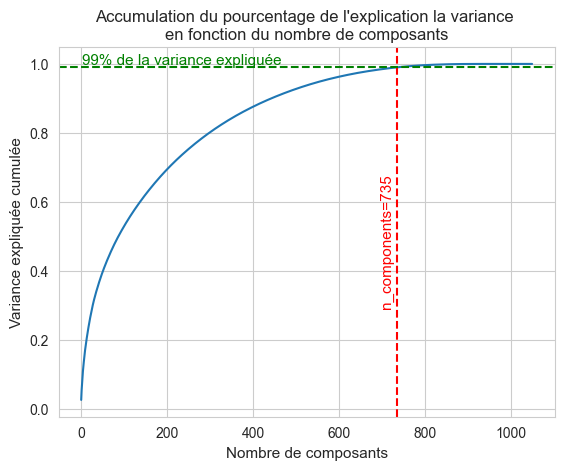

Déterminer les meilleurs hyperparamètres pour le modèle de réduction
La perplexité du TSNE a été fixé automatiquement par le modèle a 30.0
Fitting 3 folds for each of 7 candidates, totalling 21 fits


/opt/anaconda3/envs/ocds6/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ocds6/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/opt/anaconda3/envs/ocds6/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ocds6/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: __call__() missing 1 required positional

Les Meilleurs paramètres pour l'étape TSNE :
{'tsne__perplexity': 5}
Création des 7 clusters et prédiction des clusters
Correspondance des clusters :  [0 2 6 5 4 3 1]
Evaluation de la qualité du clustering


,pred_label,Décompte
0,Baby Care,238
1,Beauty and Personal Care,130
2,Computers,168
3,Home Decor & Festive Needs,137
4,Home Furnishing,109
5,Kitchen & Dining,118
6,Watches,150


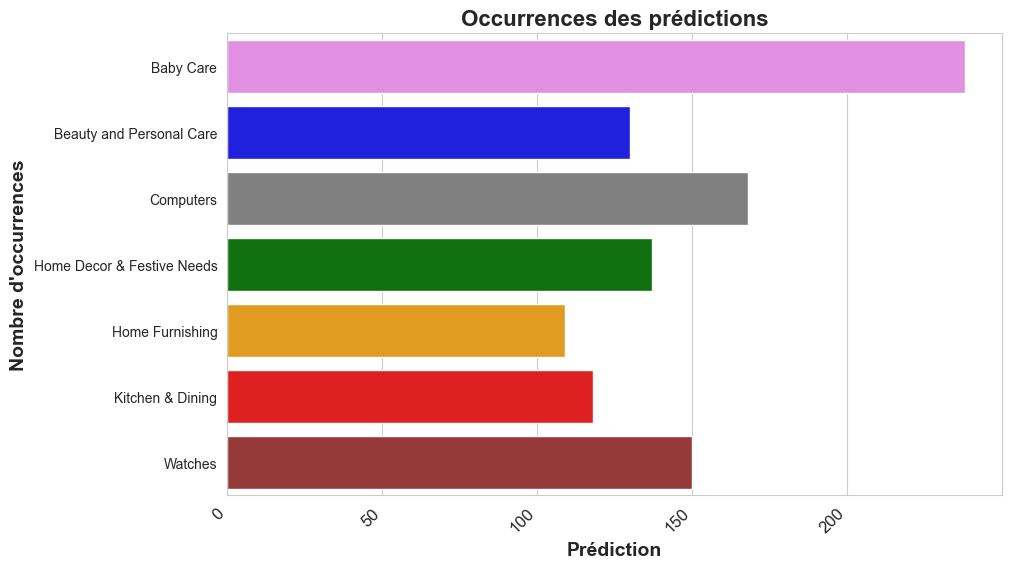

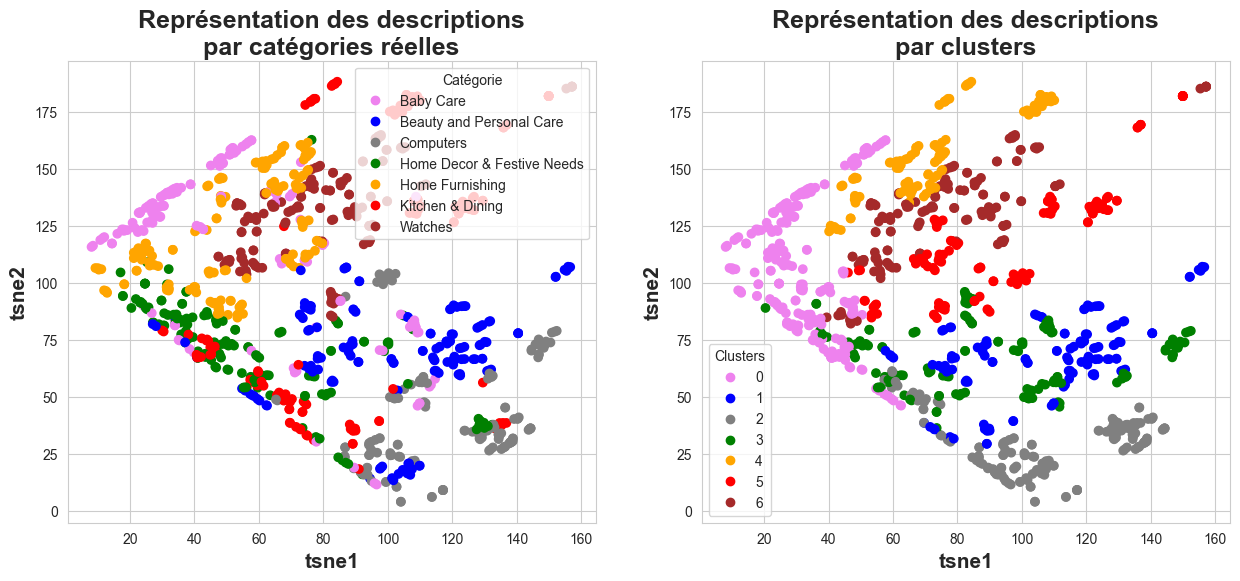

Evaluation plus poussée si l'ARI est correct


,true_label,pred_label,Décompte
0,Baby Care,Baby Care,96
1,Baby Care,Beauty and Personal Care,10
2,Baby Care,Computers,4
3,Baby Care,Home Decor & Festive Needs,14
4,Baby Care,Home Furnishing,12
5,Baby Care,Kitchen & Dining,14
6,Beauty and Personal Care,Baby Care,14
7,Beauty and Personal Care,Beauty and Personal Care,98
8,Beauty and Personal Care,Computers,18
9,Beauty and Personal Care,Home Decor & Festive Needs,2


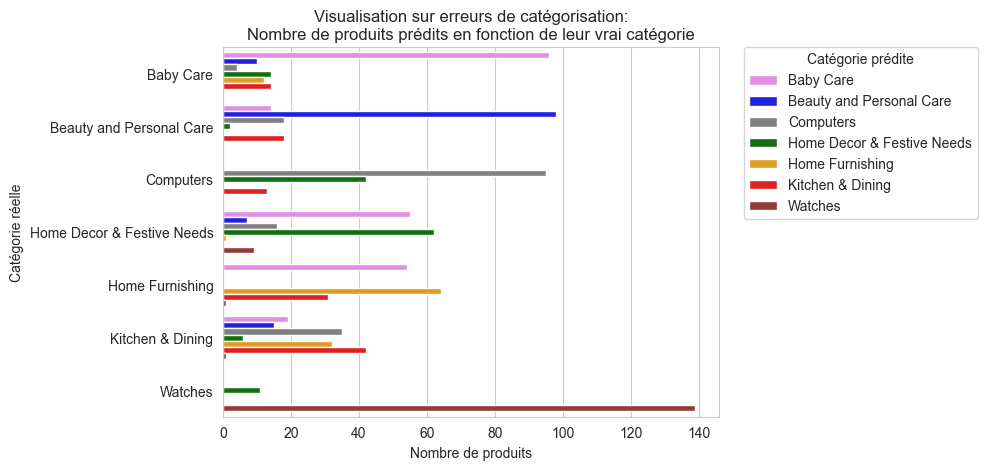

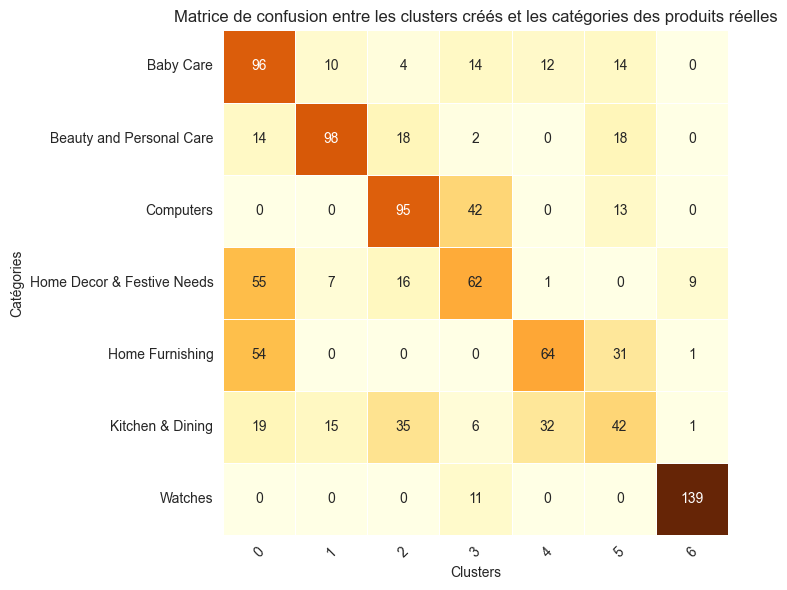

CPU times: user 2min 11s, sys: 16.1 s, total: 2min 27s
Wall time: 41.1 s


['/Users/audreyterrien/Documents/github_repositories/DS_Master_project_6/output/non_supervised_model/tf_ste_tsne_01_model.joblib']

In [26]:
# Afficher les meilleurs paramètres trouvés
print("Les Meilleurs paramètres pour l'étape TSNE :")
print(tsne_random_search.best_params_)

bold_print("Création des 7 clusters et prédiction des clusters")
# Transformation de TSNE pour être compatible avec le reste du pipeline 
# ce dernier ne supportant pas la fonction predict
class TSNETransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=2, perplexity=10, n_iter=2000, random_state=None):
        self.n_components = n_components
        self.perplexity = perplexity
        self.n_iter = n_iter
        self.random_state = random_state
        self.tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter=n_iter, random_state=random_state)

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return self.tsne.fit_transform(X)

# Définir la fonction de transformation qui convertit la sortie de TSNE en un tableau de caractéristiques
def tsne_features(tsne_output):
    return tsne_output[:, :2]

# Créer le pipeline
pipeline = Pipeline([
    # Preprocessing: construction des features
    ('preprocess', preprocessing),
    # Réduction des dimensions pour ne garder que 99% de l'explication de la variance
    ('reducDimension', TruncatedSVD(n_components=n_components)),
    # Réduction TSNE 
    ('tsne', TSNETransformer(n_components=2, 
                             perplexity=tsne_random_search.best_params_['tsne__perplexity'], 
                             n_iter=2000, 
                             random_state=random_state)),
    # Transformation pour être compatible avec le reste du pipeline
    ('tsne_features', FunctionTransformer(tsne_features)),
    # Création des 7 clusters
    ('cluster', KMeans(n_clusters=n_clusters, #-- init: il faut faire varier cette variable et non la perplexité
                       # distance - euclidienne alors qu'en réalité il y a aussi manhattan, cosinsimilarity 
                       random_state=random_state)),

])

#%%time
# Entraîner le pipeline
pipeline.fit(df[feat])

# Transformation du pipeline
X_embedded = pipeline.transform(df[feat])

# Création de features à partir du pipeline
preprocess = pipeline.named_steps['preprocess']
features = preprocess.fit_transform(df[feat])
[features.toarray().ravel()]

#%%time
# Prédiction des labels des clusters
pred_label = pipeline.predict(df[feat])

# Transformation des pred_label pour les faire matcher avec les true_label 
pred_label = conf_mat_transform(true_label, pred_label)

bold_print("Evaluation de la qualité du clustering")
# Première évaluation - visualisation sur les catégories prédits 
premiere_evaluation_graphique(pred_label)

# Représentation graphique des données (CE1)
visu_fct(X_embedded, true_label, pred_label)

# Création d'une ligne de dataframe contenant les quatre métriques d'évaluation 
# que sont V-measure, la complétude, homogénéité et l'ARI
results = eval_metrics_df(true_label, pred_label)

# Enregistrement des résultats dans un tableau
results.to_csv(path_data, index=False)

# Evaluation des résultats
results

bold_print("Evaluation plus poussée si l'ARI est correct")
# Observation sur la différence entre la réelle catégorie et sa prédiction
error_plot(true_label, pred_label)

# Visualiser de la matrice de confusion
confusion_matrix_plot(true_label, pred_label)

# Affichage des métriques d'évaluation precision, recall, f1-score, support
classification_report_df(true_label, pred_label)

# Enregistrement du pipeline
dump(pipeline, path_model)

In [28]:
classification_report_df(true_label, pred_label)

              precision  recall  f1-score  support
0                  0.40    0.64      0.49   150.00
1                  0.75    0.65      0.70   150.00
2                  0.57    0.63      0.60   150.00
3                  0.45    0.41      0.43   150.00
4                  0.59    0.43      0.49   150.00
5                  0.36    0.28      0.31   150.00
6                  0.93    0.93      0.93   150.00
accuracy           0.57    0.57      0.57     0.57
macro avg          0.58    0.57      0.57  1050.00
weighted avg       0.58    0.57      0.57  1050.00


In [29]:
from IPython.display import Markdown

def print_markdown(markdown_text):
    markdown = Markdown(markdown_text)
    print(markdown.data)

# Utilisation de la fonction pour afficher le Markdown généré par classification_report_df
report = classification_report_df(true_label, pred_label)
print_markdown(report)


TypeError: Markdown expects text, not               precision  recall  f1-score  support
0                  0.40    0.64      0.49   150.00
1                  0.75    0.65      0.70   150.00
2                  0.57    0.63      0.60   150.00
3                  0.45    0.41      0.43   150.00
4                  0.59    0.43      0.49   150.00
5                  0.36    0.28      0.31   150.00
6                  0.93    0.93      0.93   150.00
accuracy           0.57    0.57      0.57     0.57
macro avg          0.58    0.57      0.57  1050.00
weighted avg       0.58    0.57      0.57  1050.00

{'eleg': 1617, 'polyest': 3631, 'multicolor': 3083, 'abstract': 7, 'eyelet': 1728, 'door': 1502, 'curtain': 1224, 'floral': 1855, 'height': 2231, 'pack': 3328, 'enhanc': 1636, 'look': 2740, 'interior': 2448, 'made': 2791, 'high': 2249, 'qualiti': 3824, 'fabric': 1734, 'style': 4619, 'stitch': 4577, 'metal': 2965, 'ring': 4031, 'make': 2822, 'room': 4046, 'environ': 1656, 'love': 2762, 'ant': 157, 'anti': 158, 'shrinkag': 4301, 'give': 2064, 'home': 2273, 'bright': 619, 'appeal': 181, 'design': 1342, 'attent': 256, 'sure': 4671, 'heart': 2227, 'contemporari': 1063, 'slide': 4409, 'smoothli': 4435, 'draw': 1515, 'apart': 176, 'first': 1818, 'thing': 4746, 'morn': 3041, 'welcom': 5201, 'sun': 4656, 'ray': 3893, 'want': 5094, 'wish': 5266, 'good': 2125, 'whole': 5228, 'world': 5311, 'close': 872, 'even': 1670, 'creat': 1194, 'special': 4503, 'moment': 3026, 'beauti': 351, 'given': 2074, 'sooth': 4485, 'print': 3722, 'bring': 624, 'filter': 1799, 'light': 2665, 'get': 2007, 'right': 4029, '

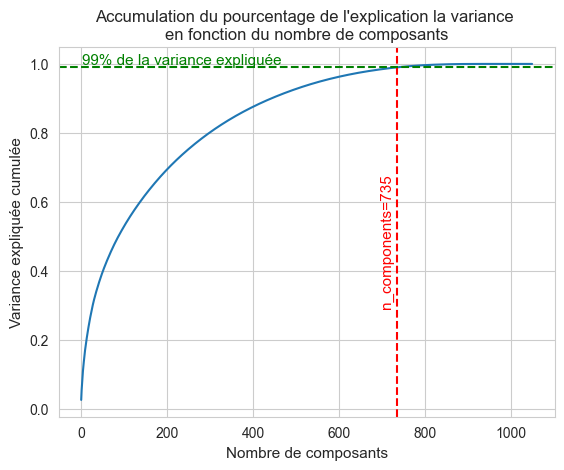

La perplexité du TSNE a été fixé automatiquement par le modèle a 30.0


'\ntsne_random_search.fit(df[feat])\n\n# Afficher les meilleurs paramètres trouvés\nprint("Les Meilleurs paramètres pour l\'étape TSNE :")\nprint(tsne_random_search.best_params_)\n'

In [38]:
# éléments à fixer pour ce modèle
feat = 'sentence_stem'
model_name = 'tf_ste_tsne_01'

# Télécharger la liste de mots vides pour la langue anglaise
#nltk.download('stopwords')

# Importer la liste de mots vides pour la langue anglaise
#stop_word = nltk.corpus.stopwords.words('english')

# Technique de preprocessing de langage choisi
preprocessing = TfidfVectorizer(stop_words=stop_word,
                                ngram_range=(1,2), #combine de mot unigrammes (un mot) et de bigramme (mot composé de 2 mots)
                                min_df=2, #min de deux mots
                                max_df=0.98,
                                #vocabulary=custom_vocab
                                )

# Création d'un premier pipeline permettant de calculer le nombre de dimension 
# à garder pour conserver une explication de la variance à une hauteur de 99%
# pour le vrai pipeline et ainsi diminuer le temps d'éxecution de la pipeline
pipeline = Pipeline([
    ('preprocess', preprocessing),
    ('reducDimension', TruncatedSVD(n_components=4000)),
])

# Entraîner le pipeline
pipeline.fit(df[feat])

# Affichage du vocabulaire
vocab = preprocessing.vocabulary_
print(vocab)

# Calculer la variance expliquée cumulée
explained_variance = pipeline.named_steps['reducDimension'].explained_variance_ratio_
cumulative_var = np.cumsum(explained_variance)

# Trouver le nombre de dimensions nécessaires pour atteindre 0.99 de la variance expliquée
n_components = np.argmax(cumulative_var >= 0.99) + 1

# Représentation graphique du nombre de dimensions minimums pour pouvoir 
# conserver 99% de l'explication de la variance observée
variance_needed_plot(cumulative_var=cumulative_var, n_components=n_components)

# Rajout du nombre de composants nécéssaire pour garder 99% de la variance +
# Détermination des hyperparamètres liées à la T-SNE
pipeline = Pipeline([
    # Preprocessing: construction des features
    ('preprocess', preprocessing),
    # Réduction des dimensions pour ne garder que 99% de l'explication de la variance
    ('reducDimension', TruncatedSVD(n_components=n_components)),
    # Réduction TSNE 
    ('tsne', TSNE(n_components=2, random_state=random_state))
])

# Entraîner le pipeline
pipeline.fit(df[feat])

# Observation sur les paramètres par défaut choisi lors de son entraînement
# pour la TSNE
print('La perplexité du TSNE a été fixé automatiquement par le modèle a', pipeline.get_params()['tsne__perplexity'])

# Définir les paramètres à tester
tsne_params = {
    'tsne__perplexity': [10, 20, 30, 40, 50, 60, 70, 80],
    #'tsne__n_iter': sp_randint(500, 5000),
}

# Créer un objet RandomizedSearchCV pour trouver les meilleurs paramètres
tsne_random_search = RandomizedSearchCV(estimator=pipeline, 
                                        param_distributions=tsne_params, 
                                        cv=5, 
                                        n_iter=20,
                                        n_jobs=-1, 
                                        verbose=1,
                                        random_state=42, 
                                        scoring='accuracy'
                                        )
"""
tsne_random_search.fit(df[feat])

# Afficher les meilleurs paramètres trouvés
print("Les Meilleurs paramètres pour l'étape TSNE :")
print(tsne_random_search.best_params_)
"""